# Pymaceuticals Inc.
---

### Analysis by Vigneshwar Cheriath

- From the analysis performed we can draw several inferences about the effectiveness of the tested treatments for SCC.

- Capomulin and Ramicane showed the smallest final tumor volumes, suggesting that they would be effective treatments for SCC

- Capumolin and Ramicane were the only treatments that showed a significant difference in median tumor volume from the placebo, suggesting that other treatments tested would not be effective treatments for SCC

- We observed a positive correlation between the weight of the mouse and the volume of the tumor, indicating that SCC is more severe for those with higher body weights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame (merging on Mouse ID)
totaldata = pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
totaldata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice
totaldata['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupemouse = totaldata.loc[totaldata.duplicated()][["Mouse ID", 'Timepoint']].reset_index(drop=True)

# Show the duplicate mouse
dupemouse

,Mouse ID,Timepoint
0,g989,0


In [4]:
# Get all the data for the duplicate mouse ID.
totaldata.loc[totaldata["Mouse ID"] == dupemouse.iloc[0,0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
totaldata = totaldata.loc[totaldata["Mouse ID"] != dupemouse.iloc[0,0]]
totaldata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Check the number of mice in the data now
totaldata['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Initialize summarytable as dataframe
summarytable = pd.DataFrame()

# Get the unique drugs
summarytable['Drug Regimen'] = totaldata['Drug Regimen'].unique()

# Set index to be the Drug Regimen and order by Drug name
summarytable = summarytable.set_index('Drug Regimen').sort_values(by=['Drug Regimen'])

# Calc mean, mediam, variance, standard deviation, and standard error of mean and create columns for them
summarytable['Mean Tumor Volume'] = totaldata.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
summarytable['Median Tumor Volume'] = totaldata.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
summarytable['Tumor Volume Variance'] = totaldata.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
summarytable['Tumor Volume Std. Dev.'] = totaldata.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
summarytable['Tumor Volume Std. Err.'] = totaldata.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Display the summary table
summarytable

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
totaldata.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

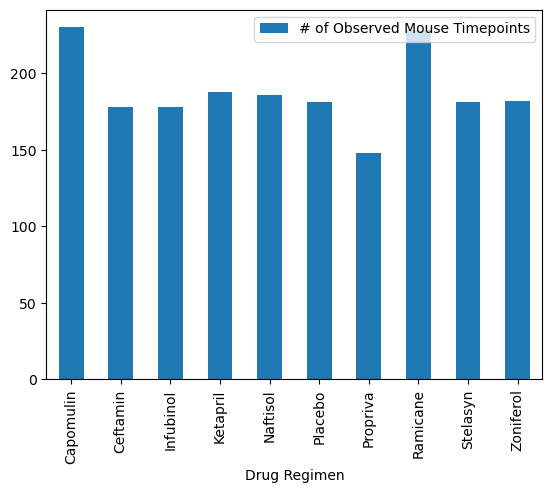

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create a dataframe with the desired x and y columns
pandasbarplot = pd.DataFrame({'Drug Regimen':totaldata.sort_values('Drug Regimen')['Drug Regimen'].unique(),
                              '# of Observed Mouse Timepoints':totaldata.groupby('Drug Regimen')['Mouse ID'].count()})

#Plot the bar chart with the desired x and y columns
pandasbarplot.plot.bar(x='Drug Regimen',y='# of Observed Mouse Timepoints')

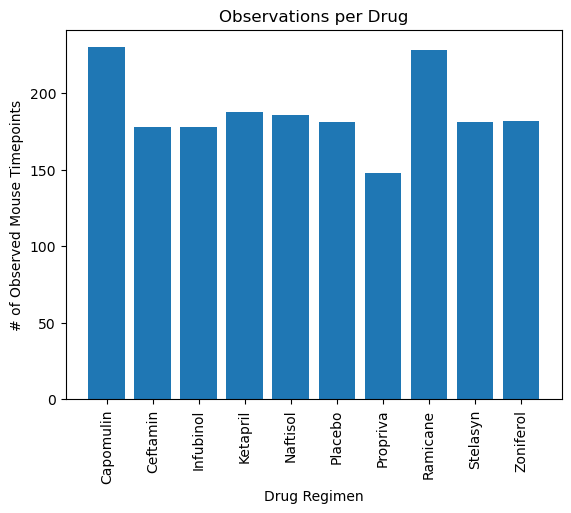

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(totaldata.sort_values('Drug Regimen')['Drug Regimen'].unique(),
        totaldata.groupby('Drug Regimen')['Mouse ID'].count())

#set axis labels and title
plt.title("Observations per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

#make the x-ticks vertical
plt.xticks(rotation="vertical")

plt.show()

<Axes: ylabel='# of Observed Mouse Timepoints'>

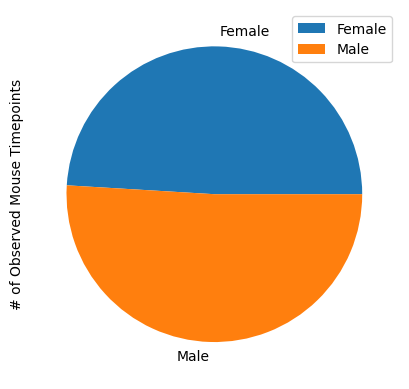

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a dataframe with the desired column grouped by sex
pandaspieplot = pd.DataFrame({'# of Observed Mouse Timepoints':totaldata.groupby('Sex')['Mouse ID'].count()})

# Plot the data as a pie chart
pandaspieplot.plot.pie(y='# of Observed Mouse Timepoints')

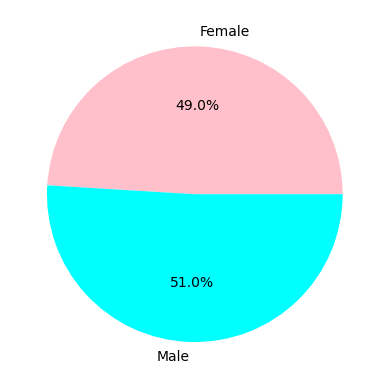

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Make the plot
plt.pie(totaldata.groupby('Sex')['Mouse ID'].count(), 
        labels=totaldata['Sex'].unique(), 
        colors=['pink','cyan'],
        autopct="%1.1f%%", shadow=False, startangle=0)

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse (note: the index is reset)
lasttimepoints = pd.DataFrame(totaldata.groupby(["Mouse ID"])['Timepoint'].max()).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
lasttimepointdata = pd.merge(lasttimepoints,totaldata,on=["Mouse ID", "Timepoint"])

lasttimepointdata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting later)
tumorvolplotdata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorvol = lasttimepointdata.loc[lasttimepointdata["Drug Regimen"] == treatment][["Tumor Volume (mm3)"]]
      
    # Add subset to the plot list (to be used for plotting later)  
    tumorvolplotdata.append(tumorvol['Tumor Volume (mm3)'])
    
    # Create the quartiles and calculate the IQR
    quartiles = tumorvol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumorvol.loc[(tumorvol['Tumor Volume (mm3)'] > upper_bound)|\
                            (tumorvol['Tumor Volume (mm3)'] < lower_bound)]['Tumor Volume (mm3)']
    
    # Print the outliers for that treatment
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\vcher\AppData\Local\Temp\ipykernel_12968\1738071679.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(treatments)


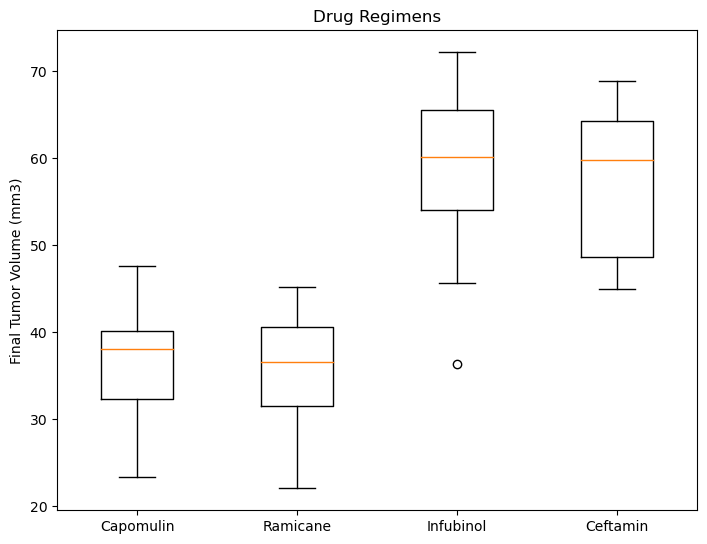

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()

# Create the axes and title
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(treatments)
ax.set_title('Drug Regimens')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Using the plot data created earlier, plot the data as a boxplot
ax.boxplot(tumorvolplotdata)

# Show the boxplot
plt.show()

## Line and Scatter Plots

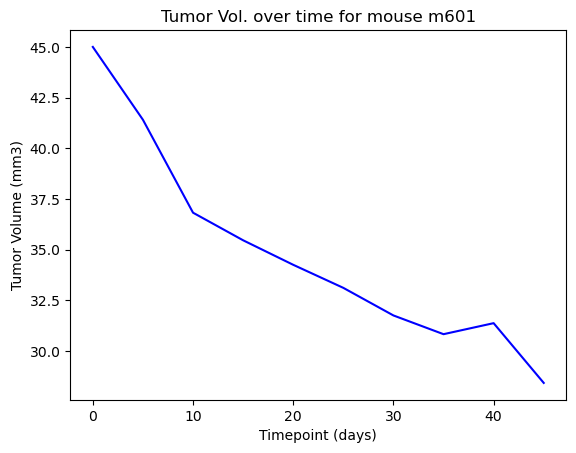

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# We will select mouse m601
mousedata = totaldata.loc[totaldata["Mouse ID"] == 'm601'][['Timepoint','Tumor Volume (mm3)']].reset_index(drop = True)

# Create a plot called mouseplot
mouseplot, = plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'], color='blue')

# Set the axis labels and titles
plt.xlabel('Timepoint (days)') 
plt.ylabel('Tumor Volume (mm3)')
plt.title("Tumor Vol. over time for mouse m601")

# Plot the data
plt.show()

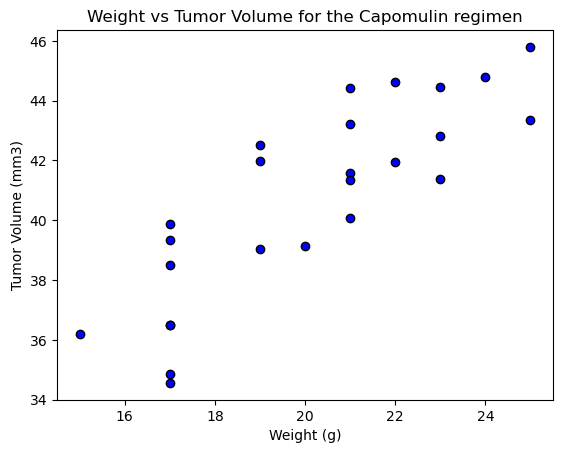

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulindata = totaldata.loc[totaldata['Drug Regimen'] == 'Capomulin'][['Mouse ID','Weight (g)','Tumor Volume (mm3)']].reset_index(drop = True)

#get the avg weights and tumor volumes for each mouse in the regimen
avgweight = pd.DataFrame(capomulindata.groupby(by = 'Mouse ID')['Weight (g)'].mean())
avgvol= pd.DataFrame(capomulindata.groupby(by = 'Mouse ID')['Tumor Volume (mm3)'].mean())

#plot the weight vs tumor volume
plt.scatter(avgweight['Weight (g)'], avgvol['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")

#retitle/label
plt.xlabel('Weight (g)') 
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs Tumor Volume for the Capomulin regimen")

#show the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


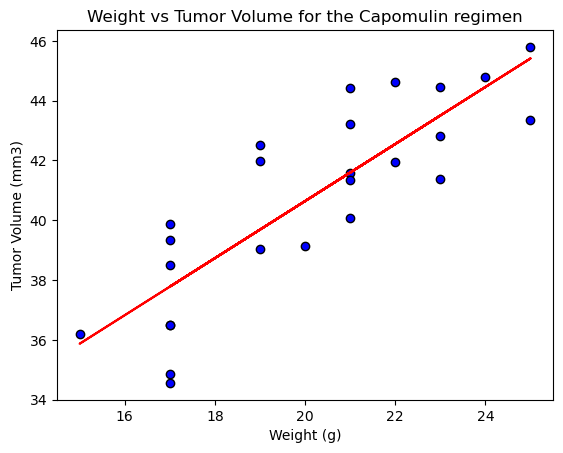

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate and display the correlation
correlation = st.pearsonr(avgweight['Weight (g)'],avgvol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Plot the weight vs tumor volume
plt.scatter(avgweight['Weight (g)'], avgvol['Tumor Volume (mm3)'], marker="o", facecolors="blue", edgecolors="black")

# Retitle/label
plt.xlabel('Weight (g)') 
plt.ylabel('Tumor Volume (mm3)')
plt.title("Weight vs Tumor Volume for the Capomulin regimen")

# Create the slope, intercept, rvalue, pvalue, stderr 
(slope, intercept, rvalue, pvalue, stderr) = linregress(avgweight['Weight (g)'], avgvol['Tumor Volume (mm3)'])
regress_values = avgweight['Weight (g)'] * slope + intercept

# Create the plot
plt.plot(avgweight['Weight (g)'],regress_values,"r-")

# show the plot
plt.show()